# Dice Analysis

One of the key new features we added is a moving average. 

After that, we combine what we have learned and developed our first simple trading strategy. 

In this simple trading strategy, we buy and hold one share of stock. 

If the 10 day moving average, MA10, is larger than 50 day moving average, MA50, which we called long one share of stock, then we do not do anything if MA50 is less than MA10. 

The result looks promising. 

But as you can see, there are two points whereby we lose money and financial analysis, we will try our best to minimize the loss. 

What do we want to know is, how to compute the chance of bankruptcy if I apply this strategy? Am I lucky enough, so that we can avoid this in the next two years? 

The simple trading strategy is built on two variables, moving average 10 and moving average 50. 

In statistics, they are called random variables. 

This is where we need to apply some statistical knowledge by asking, what is a probability rule? 

Or more formally speaking, what is in distribution of these two random variables, MA10 and MA50? 

Identify important variables is important in helping us making better prediction and decisions, not just in financial, but in other contexts as well. 

In Latin America, one popular method to verify income qualification is called the Proxy Means Test or PMT. 

PMT identifies new variables in the model, which are family observable household attributes like the material of their walls, and the ceilings or the assets found in the home to qualify them and predict their level of need. 
There is also another success story in small lending industry. Many people struggle to get loans due to insufficient and non-existing credit histories. Unfortunately, this population is often taken advantage of by untrustworthy lenders. 

There is a company called Home Credit, who makes use of variety and alternative external variables, including telecom company bills and other transnational information to predict their clients' repayment abilities. 

These new variables tend to be very important in new prediction model. 

This example gave us enough incentives to explore some basic concepts and facts about random variables. 

- What random variable is?  

- Describe the distribution of random variables, distribution helps identify extreme values of events. For example, it is used for risk management in financial context. After knowing the distribution random variables, I will apply this concept to measure the risk of investing money in Apple stock. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
# import os

# Roll two dice for multiple times

## Constructing the dataframe and the algorthm to mimic the roll of a dict

In [2]:
# Using Python, we can mimic this game. Variable die has six values, one to six, with equal chance which stands for the real die.
die = pd.DataFrame([1, 2, 3, 4, 5, 6])
sum_of_dice = die.sample(2, replace=True).sum().loc[0]
print('Sum of dice is', sum_of_dice)  

# you may get different outcomes as we now mimic the result of rolling 2 dice, but the range must be limited between 2 and 12. 

Sum of dice is 4


In [3]:
die

,0
0,1
1,2
2,3
3,4
4,5
5,6


In [4]:
# This part uses the sample() method of the die object to randomly select one value from the die with replacement. 
# The replace=True argument indicates that the value is selected with replacement, 
# meaning that the same value can be selected multiple times.
result = die.sample(2, replace=True)
# 2 because we are rolling 2 die objects
# we get index and value (column name is 0)
result

,0
3,4
1,2


In [5]:
# add them up using .sum() and get only the 2nd column (ignore the index)
result = die.sample(2, replace=True).sum().loc[0]
result

11

In this case X which we denote as sum is a random variable

Range/collection of outcomes: is from 2 to 12 (it is not a random variable).

They are realised or observed outcomes of X.
Outcomes are basically the results of the game.

In these case they are discrete random variables

Whereas stock prices are continuous random variables

In [6]:
trial = 50 
result = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]
result[:10]



[7, 7, 6, 12, 5, 5, 8, 6, 8, 7]

In [7]:
# Let's replace the none with the code of rolling three dice, instead of two

np.random.seed(1)  # This is for checking answer, do NOT modify this line of code

#Modify the code, replace the None
sum_of_three_dice = die.sample(3, replace=True).sum().loc[0]
print('Sum of three dice is', sum_of_three_dice)

Sum of three dice is 15


## Relative Frequency of observed outcomes 

In [8]:
# This is the code for summarizing the results of sum of faces by frequency

results = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]
freq = pd.DataFrame(results)[0].value_counts()
sort_freq = freq.sort_index() # sort index
print(sort_freq)

0
2     4
3     6
4     4
5     1
6     7
7     6
8     7
9     4
10    6
11    4
12    1
Name: count, dtype: int64


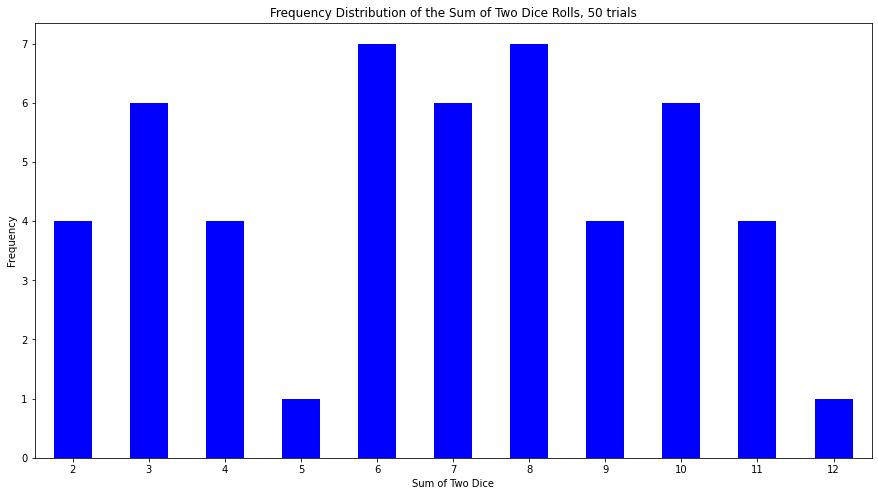

In [24]:
#plot the bar chart base on the result
sort_freq.plot(kind='bar', color='blue', figsize=(15, 8))

plt.xlabel('Sum of Two Dice')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of the Sum of Two Dice Rolls, 50 trials')
plt.xticks(rotation=0)  # Set x-axis labels rotation

plt.show()


Lets try to use a bigger set of values 

Ideally we sohuld have a standard normal distribution

In [15]:
trial1 = 5000
results1 = [die.sample(2, replace=True).sum().loc[0] for i in range(trial1)]
freq1 = pd.DataFrame(results1)[0].value_counts()
sort_freq1 = freq1.sort_index() # sort index
print(sort_freq1)

0
2     154
3     274
4     434
5     585
6     691
7     807
8     692
9     541
10    415
11    274
12    133
Name: count, dtype: int64


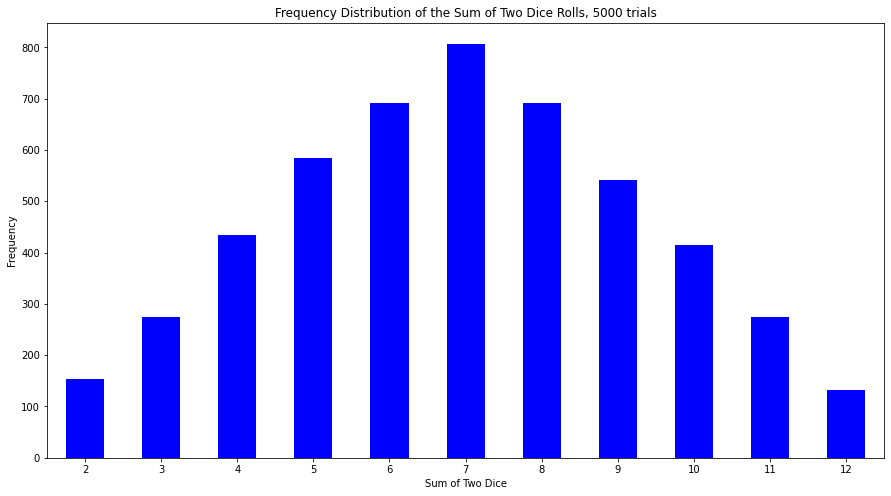

In [21]:
# Plot a bar chart
plt.figure(figsize=(15, 8))
sort_freq1.plot(kind='bar', color='blue')

plt.xlabel('Sum of Two Dice')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of the Sum of Two Dice Rolls, 5000 trials')
plt.xticks(rotation=0)  # Set x-axis labels rotation

plt.show()

### Relative Frequency


Relative frequency refers to the proportion of times a specific outcome occurs relative to the total number of trials or observations. 

For example, if you roll a six-sided dice 100 times and the number 3 comes up 20 times, the relative frequency of getting a 3 would be 20/100, or 0.2 (or 20%). 

It's a way to quantify how often an event happens within a given set of trials, helping you understand the probability of that event occurring.

Relative frequency = Number of occurrences of the Event / Total Number of Trials

Relative frequency = frequency ( of getting a 3 ) / Total Number of trials

<Axes: xlabel='0'>

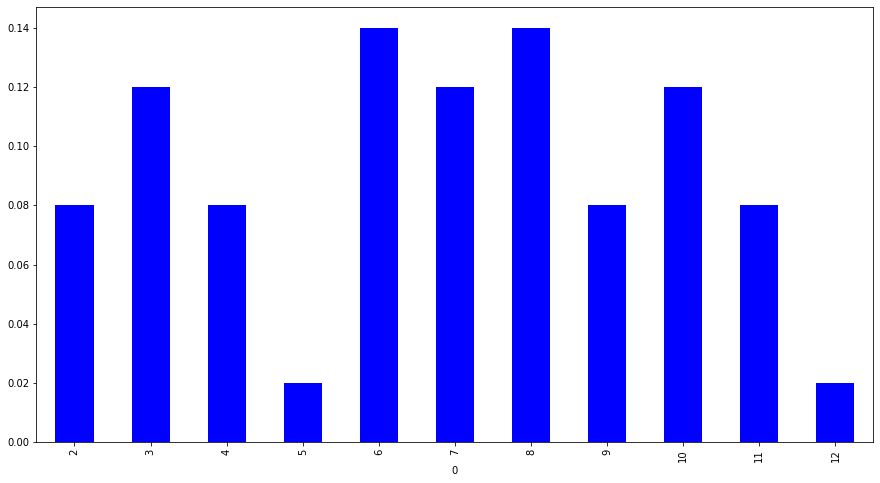

In [25]:
# Using relative frequency, we can rescale the frequency so that we can compare results from different number of trials
relative_freq = sort_freq/trial
relative_freq.plot(kind='bar', color='blue', figsize=(15, 8))

In [ ]:
# Let us try to increase the number of trials to 10000, and see what will happen...
trial = 10000
results = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]
freq = pd.DataFrame(results)[0].value_counts()
sort_freq = freq.sort_index()
relative_freq = sort_freq/trial

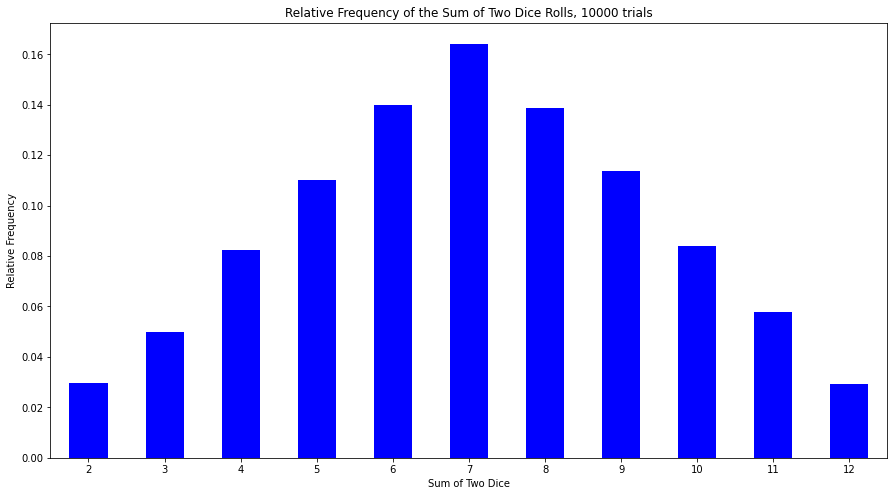

In [27]:

relative_freq.plot(kind='bar', color='blue', figsize=(15, 8))

plt.xlabel('Sum of Two Dice')
plt.ylabel('Relative Frequency')
plt.title('Relative Frequency of the Sum of Two Dice Rolls, 10000 trials')
plt.xticks(rotation=0)  # Set x-axis labels rotation

plt.show()